# **Telco Customer Churn Analysis**
##### Created by Sendhi Anshari Rasyid

---
## **1. Business Problem Understanding**

### 1.1 Konteks

Pada sebuah evaluasi akhir tahun, berdasarkan data yang diterima diketahui bahwa para pelanggan perusahaan telekomunikasi PT.XYZ, konsumennya memiliki kecenderungan *churn* yang cukup besar.

Hal tersebut merupakan sesuatu yang ingin dihindari oleh perusahaan, mengingat *cost* yang dikeluarkan untuk mencari konsumen baru lebih mahal 5x lipat dibandingkan mempertahankan konsumen yang telah ada. Selain itu, dengan meningkatkan retensi konsumen pada angka 5% juga dapat berpotensi untuk meningkatkan profit perusahaan antara 25-95%. [(Outbound Engine)](https://www.outboundengine.com/blog/customer-retention-marketing-vs-customer-acquisition-marketing/)

Berdasarkan hal tersebut, agar semua *cost* yang dikeluarkan bisa lebih efisien, pada kuartal pertama di tahun baru perusahaan ingin hal tersebut segera ditanggulangi.

### 1.2 Pernyataan Masalah

Perusahaan ingin membuat sebuah strategi yang berfokus untuk mengurangi atau bahkan mencegah potensi *churn* dari seorang konsumen, karena jika dibiarkan terlalu lama maka bisa menyebabkan kerugian. Salah satu strategi yang dapat digunakan adalah dengan memberikan sebuah promosi.

Namun agar strategi dan *cost* yang dikeluarkan efektif dan tepat guna, perusahaan hanya ingin memberikan promosi terhadap konsumen yang memiliki potensi *churn* saja.

### 1.3 Tujuan

Perusahaan dapat memprediksi kemungkinan seorang pelanggan *churn* atau tidak, sekaligus mengetahui faktor apa saja yang membuat konsumen menjadi *churn*.

### 1.4 Pendekatan Analitik

Pendekatan analitik yang dilakukan adalah dengan menganalisis riwayat data yang tersedia untuk menemukan sebuah pola tertentu. Kemudian dilakukan juga pembuatan, evaluasi, serta implementasi model *machine learning* klasifikasi untuk memprediksi apakah seorang konsumen memiliki potensi untuk *churn* atau tidak.

### 1.5 Metrik Evaluasi

| | **P-Predict** | **N-Predict** |
| --- | --- | --- |
| **P-Actual**     | TP | FN |
| **N-Actual**      | FP | TN |

**Keterangan:**
- True Positive (TP): Konsumen diprediksi ***churn*** dan sebenarnya ***churn***
- False Positive (FN): Konsumen diprediksi ***churn***, namun sebenarnya ***tidak churn***
- True Negative (TN): Konsumen diprediksi ***tidak churn*** dan sebenarnya ***tidak churn***
- False Negative (FN): Konsumen diprediksi ***tidak churn***, namun sebenarnya ***churn***

**Target:**<br>
0 : Pelanggan tidak *churn*  
1 : Pelanggan *churn*

**Type 1 error:** False Positive  
Konsekuensi: Biaya yang dikeluarkan untuk memberikan promosi menjadi sia-sia karena ditujukkan pada konsumen yang tidak tepat

**Type 2 error:** False Negative  
Konsekuensi: Hilangnya konsumen lama yang telah loyal dan perusahaan berpotensi untuk mengalami kerugian

Berdasarkan penjelasan di awal, mengurangi kemungkinan terjadinya *False Negative (FN)* menjadi sesuatu yang lebih diprioritaskan. Karena hal tersebut berdampak langsung terhadap keuntungan perusahaan dan jika terjadi, akan membutuhkan *cost* yang lebih besar untuk mendapatkan konsumen baru lagi.

*Insert mau pakai pembobotan apa*


---
## **2. Data Understanding**

Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. 

### 2.1 Penjelasan Dataset

Dataset ini merepresentasikan profil konsumen yang terdaftar selama ini. Selain status *churn* dari setiap konsumen, dilengkapi juga dengan status dari berbagai layanan berbasis langganan yang diambil oleh masing-masing konsumen.


### 2.2 Informasi Atribut

In [252]:
# Library Dasar
import pandas as pd 
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
import category_encoders as ce
from category_encoders import BinaryEncoder
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score

# Algoritma Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import EditedNearestNeighbours

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import (f1_score, confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay)

# Lainnya
from scipy.stats import normaltest
import pickle
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [226]:
# Memuat dataset
df = pd.read_csv('data_telco_customer_churn.csv')
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [227]:
# Informasi dari dataset
df.info()

print(f'\ndf shape:{df.shape}')
listItem = []
for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isna().sum(), df[col].isna().sum()/df.shape[0] * 100,
    df[col].nunique(), [df[col].unique()]])

dfDesc = pd.DataFrame(columns=['Fitur', 'Tipe Data', 'Jumlah MissingVal', '% MissingVal', 'Jumlah UniqueVal', 'UniqueVal'],
                        data=listItem)
dfDesc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB

df shape:(4930, 11)


,Fitur,Tipe Data,Jumlah MissingVal,% MissingVal,Jumlah UniqueVal,UniqueVal
0,Dependents,object,0,0.0,2,"[[Yes, No]]"
1,tenure,int64,0,0.0,73,"[[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, ..."
2,OnlineSecurity,object,0,0.0,3,"[[No, Yes, No internet service]]"
3,OnlineBackup,object,0,0.0,3,"[[No, Yes, No internet service]]"
4,InternetService,object,0,0.0,3,"[[DSL, Fiber optic, No]]"
5,DeviceProtection,object,0,0.0,3,"[[Yes, No internet service, No]]"
6,TechSupport,object,0,0.0,3,"[[Yes, No, No internet service]]"
7,Contract,object,0,0.0,3,"[[Month-to-month, Two year, One year]]"
8,PaperlessBilling,object,0,0.0,2,"[[Yes, No]]"
9,MonthlyCharges,float64,0,0.0,1422,"[[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7..."


> Terdapat beberapa hal yang bisa disimpulkan berdasarkan tabel di atas, yaitu:
> - Pada setiap kolomnya tidak terdapat *missing value* sama sekali.
> - Pada kolom `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, dan `TechSupport`, terdapat dua value yang memiliki makna serupa, yaitu *No* dengan *No Internet Service*. Agar menghindari ambiguitas, maka pada tahap *data cleaning*, kedua value tersebut akan diasumsikan dan diseragamkan menjadi *No*.

In [228]:
display(df.describe(), df.describe(include='object'))

,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
count,4930,4930,4930,4930,4930,4930,4930,4930,4930
unique,2,3,3,3,3,3,3,2,2
top,No,No,No,Fiber optic,No,No,Month-to-month,Yes,No
freq,3446,2445,2172,2172,2186,2467,2721,2957,3614


In [229]:
# Pengecekan jenis distribusi
kolom=['MonthlyCharges', 'tenure']
distribusi=[]
for i in kolom:
    stats, pval=normaltest(df[i])
    if pval > 0.05:
        distribusi.append('Normal')
    else:
        distribusi.append('Tidak Normal')
        
pd.DataFrame({'Jenis Distribusi':distribusi},index=kolom).T

,MonthlyCharges,tenure
Jenis Distribusi,Tidak Normal,Tidak Normal


> Setelah dilakukan pengecekan, semua kolom numerik pada dataset ini tidak terdistribusi normal.

| Atribut | Tipe Data | Deskripsi |
| --- | --- | --- |
| Dependents | Int | Status ketergantungan konsumen terhadap produk |
| Tenure | Object | Jumlah total lamanya seseorang terdaftar sebagai konsumen (bulan) |
| OnlineSecurity | Int | Status kepemilikan fitur 'online security' konsumen |
| OnlineBackup | Object | Status kepemilikan fitur 'online backup' konsumen |
| InternetService | Object | Status subskripsi konsumen terhadap 'internet service' |
| DeviceProtection | Object | Status kepemilikan fitur 'device protection' konsumen |
| TechSupport | Object | Status kepemilikan fitur 'tech support' konsumen |
| Contract | Object | Tipe kontrak konsumen (berdasarkan durasi) |
| PaperlessBilling | Object | Status tagihan dalam format paperless (digital)
| MonthlyCharges | Float | Jumlah yang harus dibayarkan konsumen per bulannya untuk semua servis yang dinikmati |
| Churn | Object | Status churn dari konsumen |

> Berdasarkan beberapa informasi di atas, bisa diketahui bahwa:
> - Terdapat 4930 baris dan 12 kolom data
> - Tipe data pada setiap kolomnya sudah sesuai

---
## **3. Data Cleaning**

### 3.1 Penanganan Data yang Ambigu

Pada tahap ini akan dilakukan penyeragaman value yang terdapat pada kolom `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, dan `TechSupport`. Karena pada kolom-kolom tersebut memiliki dua value bermakna serupa, yaitu *No* dan *No Internet Service*. Untuk menghindari ambiguitas, maka keduanya akan diasumsikan dan diseragamkan menjadi value *No*.

In [230]:
# Mengganti value 'No internet service' menjadi 'No'
ganti_kolom = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
for i in ganti_kolom:
    df[i] = df[i].replace({'No internet service':'No'})

In [231]:
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No,No,No,No,No,Month-to-month,Yes,23.60,No


> Seperti yang terlihat, value 'No internet service' kini telah berhasil diubah menjadi value 'No.'

### 3.2 Pengecekan Data Duplikat

Karena pada tahap sebelumnya telah terkonfirmasi bahwa pada dataset ini tidak memiliki *missing value* pada semua kolom, maka akan langsung dilakukan pengecekan terkait duplikat data.

In [232]:
# Jumlah data duplikat sebelum ditangani
Duplikat = df.duplicated().sum()
PersentaseDuplikat = round((df.duplicated().sum()/df.shape[0])*100,2)
print (f'Data duplikat: {Duplikat} data | Persentase data duplikat: {PersentaseDuplikat}%')

Data duplikat: 77 data | Persentase data duplikat: 1.56%


Terdapat 77 data yang merupakan duplikat. Karena akan mempengaruhi performa model yang akan dibangun menjadi kurang efektif dan akurat, maka data duplikat tersebut harus terlebih dulu ditangani.

In [233]:
# Penghapusan data duplikat
df.drop_duplicates(keep='first',inplace=True)
df=df.reset_index().drop(columns = {'index'})

In [234]:
# Jumlah data duplikat setelah ditangani
Duplikat = df.duplicated().sum()
PersentaseDuplikat = round((df.duplicated().sum()/df.shape[0])*100,2)
print (f'Data duplikat: {Duplikat} data | Persentase data duplikat: {PersentaseDuplikat}%')

Data duplikat: 0 data | Persentase data duplikat: 0.0%


> Setelah dilakukan pengecekan ulang, kini pada dataset tersebut sudah tidak memiliki data duplikat sama sekali.

### 3.3 Pengecekan Outlier

Akan dilakukan pengecekan outlier pada dua kolom yang memiliki tipe data numerik, yaitu kolom `MonthlyCharges` dan `tenure`.

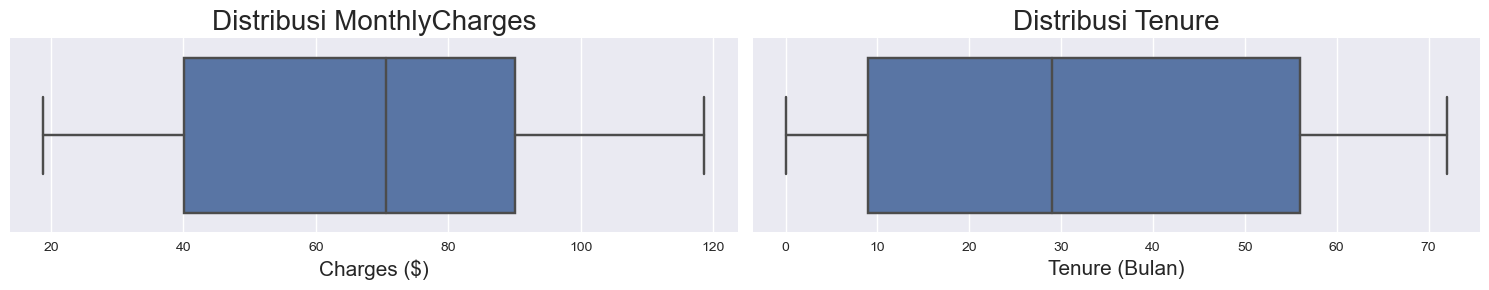

In [235]:
plt.figure(figsize=(15, 3))

# Subplot 1
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='MonthlyCharges')
plt.xlabel('Charges ($)', fontsize=15)
plt.title('Distribusi MonthlyCharges', fontsize=20)

# Subplot 2
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='tenure')
plt.xlabel('Tenure (Bulan)', fontsize=15)
plt.title('Distribusi Tenure', fontsize=20)

plt.tight_layout()
plt.show()

---
## **4. EDA**

In [236]:
# Perbandingan konsumen tidak churn dan churn
df['Churn'].value_counts()

Churn
No     3565
Yes    1288
Name: count, dtype: int64

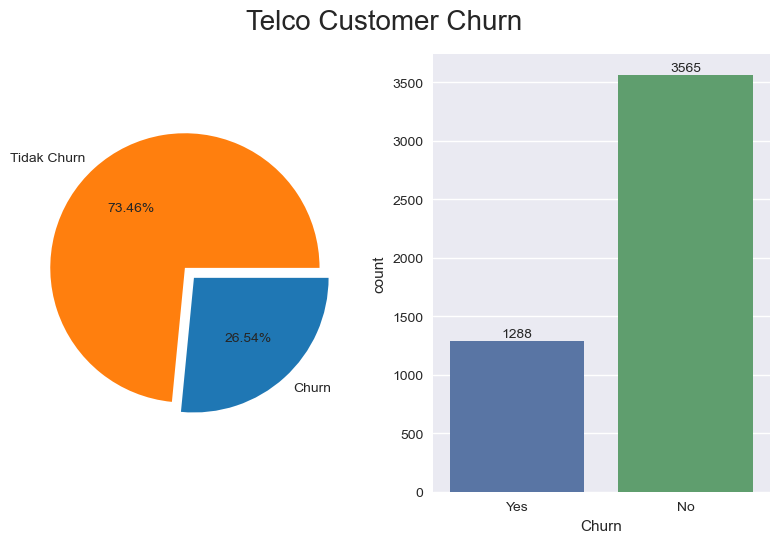

In [237]:
plt.figure().suptitle('Telco Customer Churn', fontsize=20)

plt.subplot(1,2,1)
plt.pie(df['Churn'].value_counts(), labels=['Tidak Churn', 'Churn'], colors=['tab:orange', 'tab:blue'],autopct='%.2f%%', explode=(0.05,0.05))

plt.subplot(1,2,2)
# sns.countplot(data=df, x='Churn')
ax = sns.countplot(data=df, x='Churn')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()  

> Berdasarkan visualisasi data di atas, dapat diketahui bahwa dataset ini memiliki data yang *imbalance*, karena proporsi antara konsumen yang *churn* dan tidak *churn* cukup timpang.

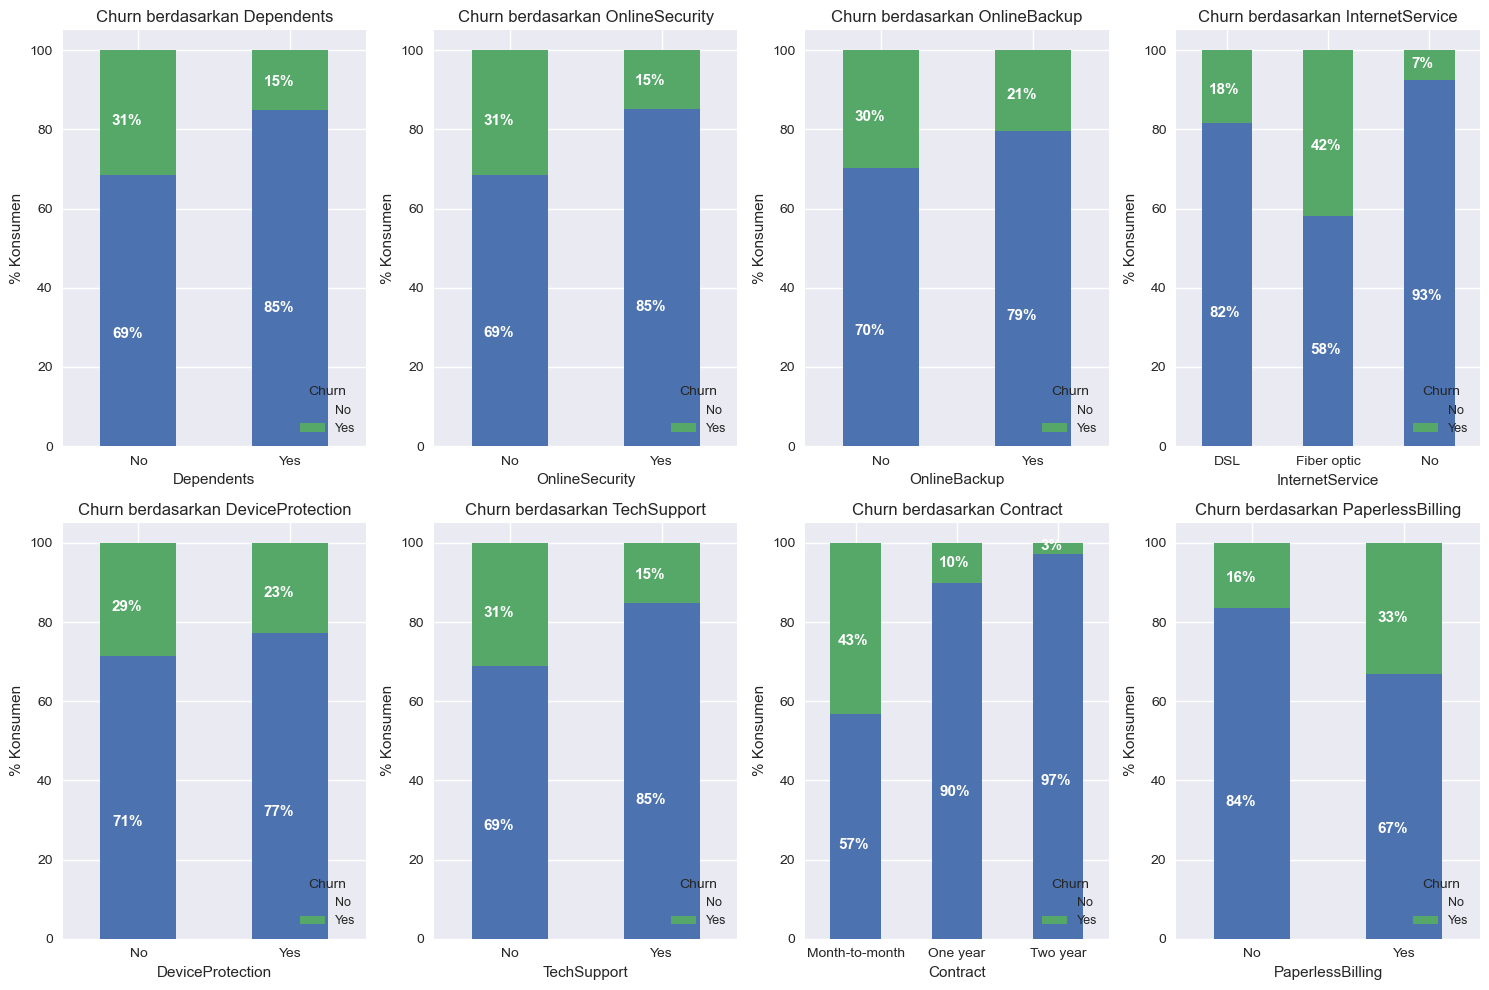

In [238]:
# Visualisasi berdasarkan feature kategorikal
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
plt.figure(figsize=(15, 10))
plotnumber = 1

for feature in cat_features[:-1]:
        column1 = feature
        # Subplot untuk masing-masing
        groupby_table = df.groupby([column1,'Churn']).size().unstack()

        # Label data
        def show() :
            if height > 0 :
                return '{:.0f}%'.format(height)
            else :
                return '' 
        
        # Subplot
        ax = plt.subplot(2, 4, plotnumber)
        
        # Pengelompokan berdasarkan feature 
        (groupby_table.T*100.0 / groupby_table.T.sum()).T.plot(kind='bar',
                                                                width = 0.5,
                                                                stacked = True,
                                                                rot = 0, 
                                                                ax = ax)

        ax.legend(loc = 'lower right', prop={'size':9}, title = 'Churn')
        ax.set_ylabel('% Konsumen')
        ax.set_title(f'Churn berdasarkan {column1}', size = 12)

        # Label
        for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax.annotate(show(), (p.get_x()+0.15*width, p.get_y()+.4*height),
                        color = 'white',
                        weight = 'bold',
                        size = 11)
        
        plt.tight_layout()
        plotnumber += 1

>- Jika dibandingkan dengan skema `contract` lainnya, konsumen yang melakukan kontrak dengan skema 'month-to-month' memiliki kecenderungan *churn* yang cukup besar, yaitu 43%
>- Konsumen yang menggunakan skema `InternetService` berupa 'Fiber Optic', memiliki kecenderungan *churn* yang cukup besar dibandingkan skema lainnya, yaitu 42%
>- Konsumen yang tidak melakukan subskripsi terhadap `TechSupport`, `OnlineSecurity`, dan `OnlineBackup` memiliki kecenderungan untuk *churn* yang lebih besar, dengan persentase >30%

---
## **5. Data Preprocessing dan Feature Engineering**

In [239]:
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No,No,No,No,No,Month-to-month,Yes,23.60,No


Setelah memahami dan membersihkan dataset yang tersedia, maka selanjutnya akan dilakukan tahap preprocessing dan feature engineering, seperti:

>- Pada kolom `Contract`, `Dependents`, `OnlineSecurity`, `InternetService`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, dan `PaperlessBilling` akan menggunakan Binary Encoding,karena fitur-fitur tersebut termasuk ke dalam non-ordinal dan urutan datanya tidak diperhatikan.
>- 'MinMaxScaler' akan digunakan untuk melakukan *scaling* pada kolom `tenure` dan `MonthlyCharges` karena keduanya memiliki distribusi yang tidak normal dan ketiadaan outlier.

### 5.1 Transformer dan Target Encoding

In [240]:
# Membuat Transformer
transformer = ColumnTransformer([
    ('min_max_scaler', MinMaxScaler(), ['tenure', 'MonthlyCharges']),
    ('binary', ce.BinaryEncoder(), ['Contract', 'Dependents', 'OnlineSecurity', 'InternetService', 'OnlineBackup','DeviceProtection', 'TechSupport', 'PaperlessBilling'])
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('min_max_scaler', MinMaxScaler(),
                                 ['tenure', 'MonthlyCharges']),
                                ('binary', BinaryEncoder(),
                                 ['Contract', 'Dependents', 'OnlineSecurity',
                                  'InternetService', 'OnlineBackup',
                                  'DeviceProtection', 'TechSupport',
                                  'PaperlessBilling'])])

In [241]:
# Target encoding
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

### 5.2 Data Splitting

Data Splitting yang dilakukan pada model ini adalah 80-20, di mana 80% mengacu sebagai data train dan 20% sisanya mengacu sebagai data test.

In [242]:
# Membuat fitur x dan target y
x = df.drop(columns=['Churn'])
y = df['Churn']

In [243]:
# Melakukan data splitting
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    stratify=y,
    test_size=0.2,
    random_state=0
)

In [244]:
x_train.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges
3738,No,67,Yes,Yes,DSL,No,Yes,Two year,Yes,50.95
3311,Yes,71,Yes,Yes,DSL,Yes,Yes,Two year,No,85.45
2379,No,15,No,No,No,No,No,Month-to-month,Yes,26.35
261,No,31,Yes,No,Fiber optic,No,No,Month-to-month,No,89.45
107,No,36,No,No,Fiber optic,No,No,Month-to-month,Yes,84.10


In [245]:
transformer.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('min_max_scaler', MinMaxScaler(),
                                 ['tenure', 'MonthlyCharges']),
                                ('binary', BinaryEncoder(),
                                 ['Contract', 'Dependents', 'OnlineSecurity',
                                  'InternetService', 'OnlineBackup',
                                  'DeviceProtection', 'TechSupport',
                                  'PaperlessBilling'])])

---
## **6. Modeling**

Untuk melakukan benchmarking awal, akan dicoba menggunakan beberapa metode, yaitu Logistic Regression, K-Nearest Neighbors, Decision Tree, Random Forest, dan XGBoost.

### 6.1 Model Benchmarking

In [246]:
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
xgb = XGBClassifier()

# Definisi model
nama_model = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost']
models = [logreg, knn, dt, rf, xgb]
score=[]
rata=[]
std=[]

# Looping untuk setiap model
for i in models:
    skfold = StratifiedKFold(n_splits=5) # 5-fold cross-validation
    estimator = Pipeline([
        ('preprocess', transformer), 
        ('model', i)])   
    model_cv = cross_val_score(estimator, x_train, y_train, cv=skfold, scoring='recall')  # Recall is used as the evaluation metric
    score.append(model_cv)  
    rata.append(model_cv.mean()*100)
    std.append(model_cv.std())

pd.DataFrame({'model':nama_model, 'mean recall':rata, 'sdev':std}).set_index('model').sort_values(by='mean recall', ascending=False) 

,mean recall,sdev
model,,
Logistic Regression,51.844660,0.032405
XGBoost,51.650485,0.013935
Decision Tree,49.708738,0.013592
KNN,47.184466,0.014203
Random Forest,46.796117,0.014595


> Jika dibandingkan dengan metode lain yang telah dicoba, metode Logistic Regression berada pada posisi puncak dalam melakukan prediksi *churn* konsumen dengan nilai recall yang tertinggi. Hal tersebut berarti hasil dari Logistic Regression memiliki kelebihan untuk secara akurat mengidentifikasi konsumen yang berpotensi *churn*.

### 6.2 Resampling Benchmarking

In [247]:
# models = [logreg, knn, dt, rf, xgb]
# score_recall = []

# def y_pred_func(i):
#     smote_ = SMOTE(random_state=0)
#     estimator=Pipeline([
#         ('preprocess', transformer),
#         ('resampling', smote_),
#         ('model',i)])
#     x_train, x_test
    
#     estimator.fit(x_train, y_train)
#     return(estimator,estimator.predict(x_test),x_test)

# for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost']):
#     estimator,y_pred, x_test = y_pred_func(i)
#     y_predict_prob = estimator.predict_proba(x_test)[:,1]
#     score_recall.append(roc_auc_score(y_test, y_predict_prob))
#     print(j,'\n', classification_report(y_test, y_pred))
    
# pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],
#              'roc_auc score':score_recall}).set_index('model').sort_values(by='score recall', ascending=False)

In [248]:
# Define imbalance treatment methods
ros = RandomOverSampler(random_state=0)
rus = RandomUnderSampler(random_state=0)
smote = SMOTE(random_state=0)
near = NearMiss()
smoteen = SMOTEENN(random_state=0)
enn = EditedNearestNeighbours()

# Dictionary models 
models = {'KNN': knn,
          'Logistic Regression': logreg,
          'Decision Tree': dt,
          'XGBoost' : xgb,
          'Random Forest' : rf
          }

# Dictionary resampling method 
resamples = {
    'none': None,
    'ros': ros,
    'rus': rus,
    'smote': smote,
    'enn': enn,
    'near miss': near,
    'smoteenn': smoteen
}

# Dictionary metrics 
metrics = {'balanced_accuracy': 'balanced_accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'f1': 'f1'}

In [253]:
# Original lists to store results
test_accuracy_arr = []
test_precision_arr = []
test_recall_arr = []
test_f1_arr = []
list_model = []
list_resample = []

# New list to store recall before resampling
test_recall_no_resample_arr = []

# Function to calculate recall without resampling
def calculate_recall_no_resampling(model, X_train, y_train):
    crossval_no_resample = StratifiedKFold(n_splits=5)
    estimator_no_resample = Pipeline([
        ('transform', transformer),
        ('model', model),
    ])
    scores_no_resample = cross_validate(estimator_no_resample, x_train, y_train, cv=crossval_no_resample, scoring='recall')
    return scores_no_resample['test_score'].mean() * 100

# Iterate over all models, resampling, and cross-validate method
for name_resample, resample in resamples.items():
    for name_model, model in models.items():
        crossval = StratifiedKFold(n_splits=5)

        if resample == None:
            estimator = Pipeline([
                ('transform', transformer),
                ('model', model),
            ])
        else:
            estimator = Pipeline([
                ('transform', transformer),
                ('resample', resample),
                ('model', model),
            ])

        list_model.append(name_model)
        list_resample.append(name_resample)
        scores = cross_validate(estimator, x_train, y_train, cv=crossval, scoring=metrics)
        # test_accuracy_arr.append(scores['test_balanced_accuracy'].mean() * 100)
        # test_precision_arr.append(scores['test_precision'].mean() * 100)
        test_recall_arr.append(scores['test_recall'].mean() * 100)
        # test_f1_arr.append(scores['test_f1'].mean() * 100)

        # Calculate and append recall without resampling
        recall_no_resample = calculate_recall_no_resampling(model, x_train, y_train)
        test_recall_no_resample_arr.append(recall_no_resample)

# Create a dataframe for all of the benchmarking output
model_bench = pd.DataFrame({
    'model': list_model,
    'resample': list_resample,
    # 'accuracy': test_accuracy_arr,
    # 'precision': test_precision_arr,
    'recall_resampling': test_recall_arr,
    'recall_no_resampling': test_recall_no_resample_arr,  # New column added
    # 'F1': test_f1_arr
})

In [254]:
model_bench.sort_values('recall_resampling', ascending=False).head()

,model,resample,recall_resampling,recall_no_resampling
31,Logistic Regression,smoteenn,81.165049,51.844660
23,XGBoost,enn,80.388350,51.650485
24,Random Forest,enn,80.194175,46.796117
21,Logistic Regression,enn,80.000000,51.844660
11,Logistic Regression,rus,79.902913,51.844660
